-----------------
## **Technical requirements**
-----------------


```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
conda install dask
conda install conda-forge::spyndex

```

In [46]:
import ee
import geemap

import spyndex,eemont

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt 

# Slightly advanced library for data visualization            
import seaborn as sns 

In [5]:
# Authenticate and Initialize Earth Engine
geemap.ee_initialize()

-----------------
## **Load data**
-----------------

In [6]:
sahel_adm2 = ee.FeatureCollection("projects/ee-aboubacarhema94/assets/ACLED/G5_Sahel_adm2N")
#spectral = require("users/dmlmont/spectral:spectral")

In [9]:
# Getting images for all 2022
start = '2022-01-01'
end = '2022-12-31'
# Landsat 8
l8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
      .filterDate(start, end) \
      .filterMetadata('CLOUD_COVER', 'less_than', 80)


dataset = "LANDSAT/LC08/C02/T1_L2"

image = l8.mean()

#image_l = spyndex.scale(image,dataset)

AttributeError: module 'spyndex' has no attribute 'scale'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: title={'center': 'SAVI'}>

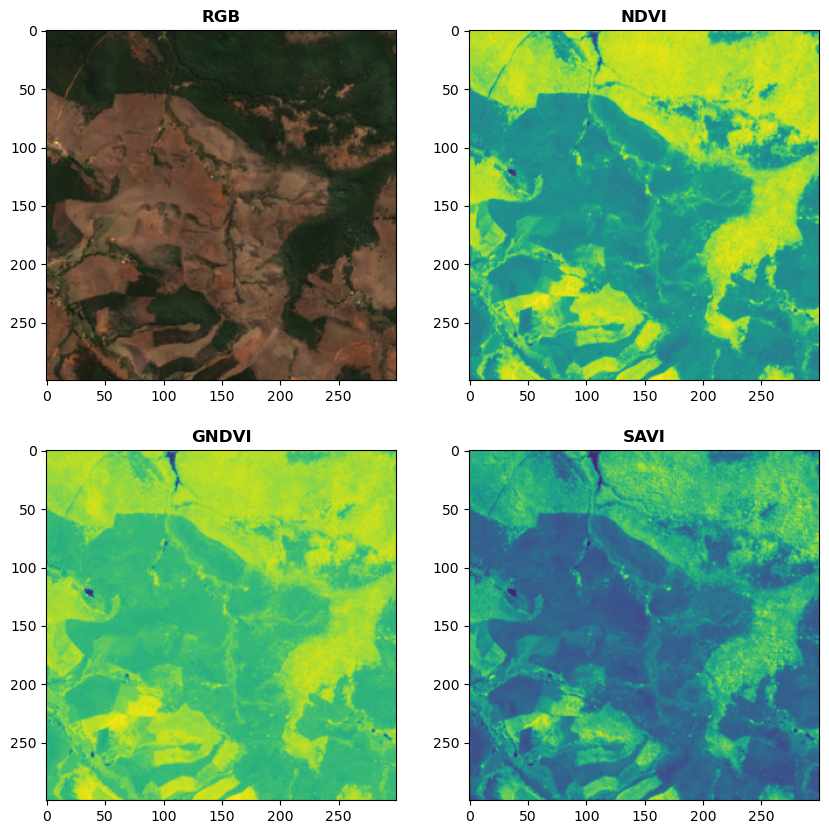

In [16]:
import spyndex
import xarray as xr
import matplotlib.pyplot as plt
from rasterio import plot

# Open a dataset (in this case a xarray.DataArray)
snt = spyndex.datasets.open("sentinel")

# Scale the data (remember that the valid domain for reflectance is [0,1])
snt = snt / 10000

# Compute the desired spectral indices
idx = spyndex.computeIndex(
    index = ["NDVI","GNDVI","SAVI"],
    params = {
        "N": snt.sel(band = "B08"),
        "R": snt.sel(band = "B04"),
        "G": snt.sel(band = "B03"),
        "L": 0.5
    }
)

# Plot the indices (and the RGB image for comparison)
fig, ax = plt.subplots(2,2,figsize = (10,10))
plot.show(snt.sel(band = ["B04","B03","B02"]).data / 0.3,ax = ax[0,0],title = "RGB")
plot.show(idx.sel(index = "NDVI").data,ax = ax[0,1],title = "NDVI")
plot.show(idx.sel(index = "GNDVI").data,ax = ax[1,0],title = "GNDVI")
plot.show(idx.sel(index = "SAVI").data,ax = ax[1,1],title = "SAVI")

In [30]:
# Open a dataset (in this case a pandas.DataFrame)
df = spyndex.datasets.open("spectral")
# Scale the data (remember that the valid domain for reflectance is [0,1])
#df = df / 10000




In [32]:
# Compute the desired spectral indices
idx = spyndex.computeIndex(
    index = ["MNDWI","BRBA","NBAI","NDSI","VARI","SAVI","OSAVI","NDMI","NBAI","EVI","NDVI","SR","ARVI","UI"],
    params = {
        "A": df["SR_B1"],
        "B": df["SR_B2"],
        "G": df["SR_B3"],
        "R": df["SR_B4"],
        "N": df["SR_B5"],
        "S1": df["SR_B6"],
        "S2": df["SR_B7"],
        #"T1": df["SR_B10"],
        "L": 0.5, # for IBI
        "g": 2.5, # for EVI,
        "gamma": 1, # for ARVI
        "C1": 6, # for EVI
        "C2": 7.5 # for EVI
    }
)



In [48]:
img = ee.Image("USDA/NAIP/DOQQ/m_3009057_ne_15_1_20170910")
img = img / 255.0

In [52]:
#img.getInfo()
#img = img.addBands(idx)

In [55]:
img.bandNames().getInfo()

['R', 'G', 'B', 'N']

In [53]:
import geemap.colormaps as cm

In [54]:
#Map = geemap.Map()
Map.addLayer(img[["R","G","B"]],{"min":0,"max":0.3},"RGB")
#Map.addLayer(img["VARI"],{"palette":cm.palettes.ndvi},"VARI")
#Map.addLayer(img["ExG"],{"palette":cm.palettes.ndvi},"ExG")
#Map.addLayer(img["NDVI"],{"palette":cm.palettes.ndvi},"NDVI")
#Map.centerObject(img,13)
Map

Map(center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position', 'transparent…

In [39]:
list_indices = ["MNDWI","BRBA","NBAI","NDSI","VARI","SAVI","OSAVI","NDMI","NBAI","EVI","NDVI","SR","ARVI","UI"]


In [40]:
#Initialize a Map
Map = geemap.Map()
Map.centerObject(sahel_adm2)

In [43]:
idx["MNDWI"]

0     -0.396819
1     -0.365287
2     -0.362146
3     -0.312464
4     -0.290105
         ...   
115   -0.469095
116   -0.388076
117   -0.426189
118   -0.371891
119   -0.379116
Name: MNDWI, Length: 120, dtype: float64

In [45]:
df["SR_B1"]

0      0.089850
1      0.073859
2      0.072938
3      0.087733
4      0.090593
         ...   
115    0.018048
116    0.015325
117    0.014830
118    0.013620
119    0.014610
Name: SR_B1, Length: 120, dtype: float64

In [44]:
# Add Population Sahel layer
viz_pop = { # Set visualization parameters
  'min': 0.0,
  'max': 1.0,
  'palette': ['24126c', '1fff4f'],
}
Map.addLayer(df["SR_B1"],viz_pop,'Population Sahel', True, 1)

TypeError: unhashable type: 'Series'

In [27]:
'''
# Open a dataset (in this case a xarray.DataArray)
snt = spyndex.datasets.open("sentinel")

# Scale the data (remember that the valid domain for reflectance is [0,1])
snt = snt / 10000


# Compute the desired spectral indices
idx = spyndex.computeIndex(
    index = ["MNDWI","BRBA","NBAI","NDSI","VARI","SAVI","OSAVI","NDMI","NBAI","EVI","NDVI","SR","ARVI","UI"],
    params = {
        "N": snt.sel(band = "B08"),
        "R": snt.sel(band = "B04"),
        "G": snt.sel(band = "B03"),
        "S1": 1, # for MNDWI
        "S1": 1, # for MNDWI
        "L": 0.5, # for IBI
        "g": 2.5, # for EVI,
        "gamma": 1, # for ARVI
        "C1": 6, #for EVI
        "C2": 7.5 # for EVI
    }
)
'''

'\n# Open a dataset (in this case a xarray.DataArray)\nsnt = spyndex.datasets.open("sentinel")\n\n# Scale the data (remember that the valid domain for reflectance is [0,1])\nsnt = snt / 10000\n\n\n# Compute the desired spectral indices\nidx = spyndex.computeIndex(\n    index = ["MNDWI","BRBA","NBAI","NDSI","VARI","SAVI","OSAVI","NDMI","NBAI","EVI","NDVI","SR","ARVI","UI"],\n    params = {\n        "N": snt.sel(band = "B08"),\n        "R": snt.sel(band = "B04"),\n        "G": snt.sel(band = "B03"),\n        "S1": 1, # for MNDWI\n        "S1": 1, # for MNDWI\n        "L": 0.5, # for IBI\n        "g": 2.5, # for EVI,\n        "gamma": 1, # for ARVI\n        "C1": 6, #for EVI\n        "C2": 7.5 # for EVI\n    }\n)\n'

In [ ]:
list_indices = ["IBI", "MNDWI", "NBAI", "NDMI",
                                          "EVI", "NDVI", "NDBI", "SR",
                                          "ARVI", "UI", "MNDWI",  #"NBUI",
                                          "BRBA", "NBAI","NDSI", "VARI",
                                          "SAVI", "OSAVI", "NDMI"]

l8_1 = spectral.computeIndex(image_l,list_indices,parameters)

In [ ]:
def makeStats(feature):
  for i in list_indices:
    area = l8_1.select(list_indices[i])
    stats = area.reduceRegion(**{
        'reducer' : ee.Reducer.mean(),
        'geometry' : feature.geometry(),
        'scale' : 30,
        'maxPixels':1e13
        }).get(list_indices[i])

  feature = feature.set(i.toString() ,stats)

  return feature

ExReduction = sahel_adm2.map(makeStats)

In [15]:
snippet = """
function makeStats(feature){
  for (var i in list_indices) {
    var area = l8_1.select(list_indices[i]);
    var stats = area.reduceRegion({
        reducer : ee.Reducer.mean(),
        geometry : feature.geometry(),
        scale : 30,
        maxPixels:1e13
        }).get(list_indices[i]) 
  
  feature = feature.set(i.toString() ,stats)
  }
  return feature
}

var ExReduction = aois.map(makeStats);

"""

geemap.js_snippet_to_py(snippet, add_new_cell=True, import_ee=False)

In [ ]:
'''
https://github.com/awesome-spectral-indices/awesome-spectral-indices#expressions
g: Gain factor (e.g. Used for EVI).
L: Canopy background adjustment (e.g. Used for SAVI and EVI).
C1: Coefficient 1 for the aerosol resistance term (e.g. Used for EVI).
C2: Coefficient 2 for the aerosol resistance term (e.g. Used for EVI).
cexp: Exponent used for OCVI.
nexp: Exponent used for GDVI.
alpha: Weighting coefficient used for WDRVI, BWDRVI and NDPI.
beta: Calibration parameter used for NDSIns.
gamma: Weighting coefficient used for ARVI.
omega: Weighting coefficient used for MBWI.
sla: Soil line slope.
slb: Soil line intercept.
PAR: Photosynthetically Active Radiation.
k: Slope parameter by soil used for NIRvH2.
lambdaN: NIR wavelength used for NIRvH2 and NDGI.
lambdaR: Red wavelength used for NIRvH2 and NDGI.
lambdaG: Green wavelength used for NDGI.
The kernel indices are constructed using a special type of parameters:

kAB: Kernel of bands/parameters A and B (e.g. kNR means k(N,R), where k is the kernel function).
p: Kernel degree (used for the polynomial kernel).
c: Free parameter that trades off the influence of higher-order versus lower-order terms (used for the polynomial kernel).
'''